In [1]:
import numpy as np
import pandas as pd

<ipython-input-1-59ab05e21164>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
df = pd.read_csv("cleaned_cx_data.csv")

In [44]:
#grouping by issue category and total time spent in each category
# Grouping and resetting the index
grouped_df = df.groupby('issue_category')['time_spent_minutes'].sum().reset_index()
grouped_df.to_csv("category_to_time.csv", index = False)
# Convert to 2D array (list of lists)
result_array = grouped_df.values.tolist()
categories = [item[0] for item in result_array]
sums = [item[1] for item in result_array]

In [35]:
categories
sums

[293.04, 408.04, 373.04, 548.04]

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

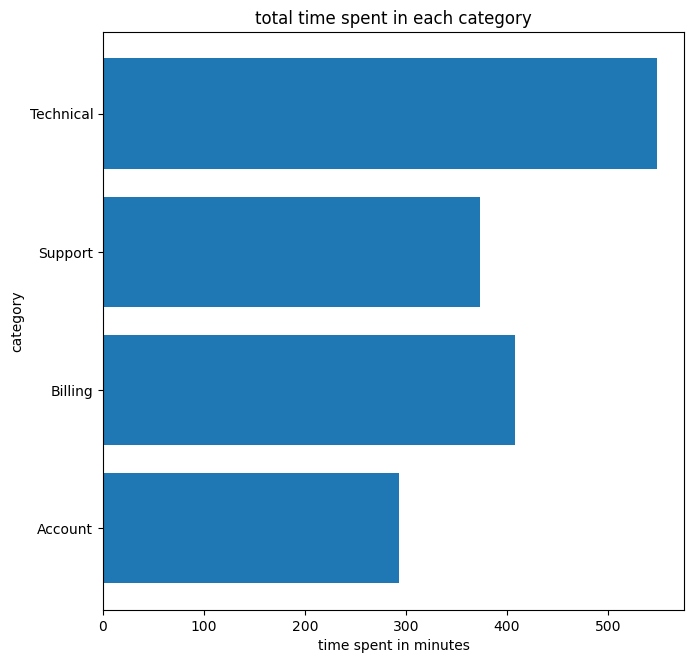

In [39]:
plt.subplots(figsize = (7.5, 7.5))
plt.ylabel("category")
plt.xlabel("time spent in minutes")
plt.title("total time spent in each category")
plt.barh(categories, sums)
plt.show()

In [41]:
#Let's find the average resolution time for resolved and unresolved issues
status_group = df.groupby('resolution_status')['time_spent_minutes'].mean()

In [43]:
#that's the average time for resolved and unresolved cases
status_group

resolution_status
Resolved      27.411250
Unresolved    43.823529
Name: time_spent_minutes, dtype: float64

In [45]:
status_group.to_csv("status_to_AVG_time.csv", index = False)


In [48]:
avg_time_cat = df.groupby('issue_category')['time_spent_minutes'].mean().reset_index()
avg_time_cat.to_csv("averageTime_to_category.csv", index = False)
avg_time_cat

,issue_category,time_spent_minutes
0,Account,24.420000
1,Billing,31.387692
2,Support,33.912727
3,Technical,42.156923


In [53]:
avgtime_cat_list = avg_time_cat.values.tolist()
avgtime_cat_list

[['Account', 24.42],
 ['Billing', 31.38769230769231],
 ['Support', 33.912727272727274],
 ['Technical', 42.15692307692307]]

In [54]:
categories = [item[0] for item in avgtime_cat_list]
avg = [item[1] for item in avgtime_cat_list]

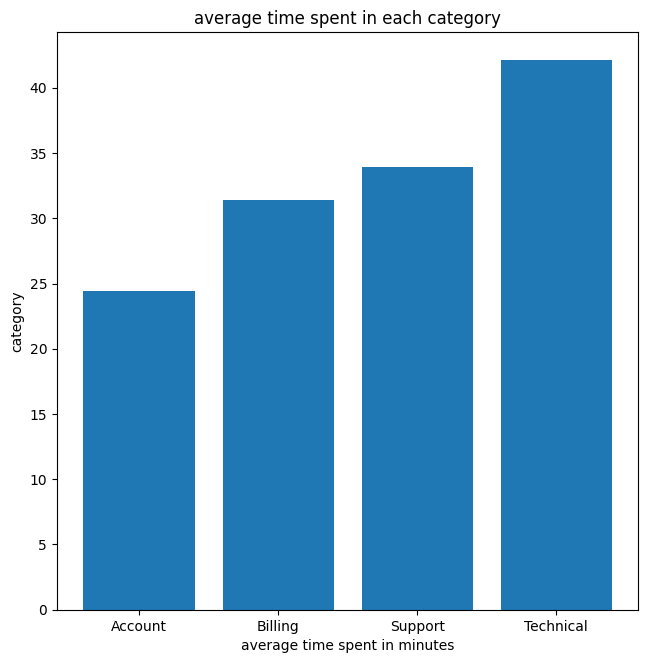

In [56]:
plt.subplots(figsize = (7.5, 7.5))
plt.ylabel("category")
plt.xlabel("average time spent in minutes")
plt.title("average time spent in each category")
plt.bar(categories, avg)
plt.show()